# Data storytelling using matplotlib - line chart

In [1]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

In [2]:
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [11]:
df_yearly_quantity = duckdb.query("""--sql
    SELECT 
        year,
        SUM(quantity) AS Quantity
    FROM df
    GROUP BY year
    ORDER BY year ASC
"""
).df().set_index("Year").iloc[:-1]

In [12]:
df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


## Line chart

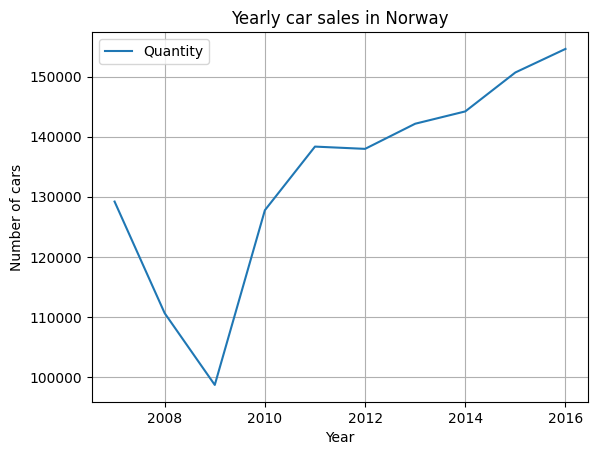

In [15]:
ax = df_yearly_quantity.plot(
    title = "Yearly car sales in Norway",
    ylabel = "Number of cars"
)
ax.grid()

## Storytelling on the graph above

### remove clutter

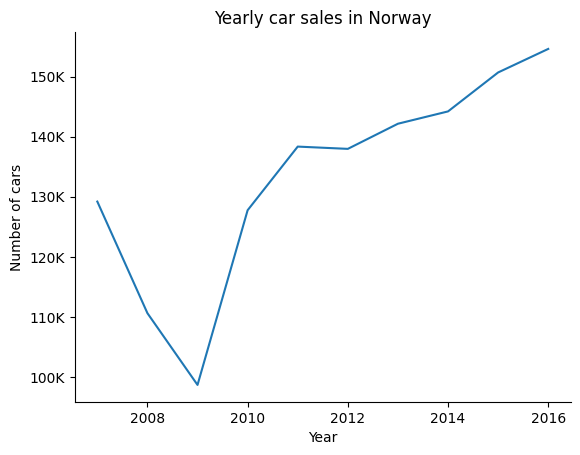

In [24]:
from matplotlib.ticker import FuncFormatter

ax = df_yearly_quantity.plot(
    title = "Yearly car sales in Norway",
    ylabel = "Number of cars"
)

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

### constrast and descriptive title

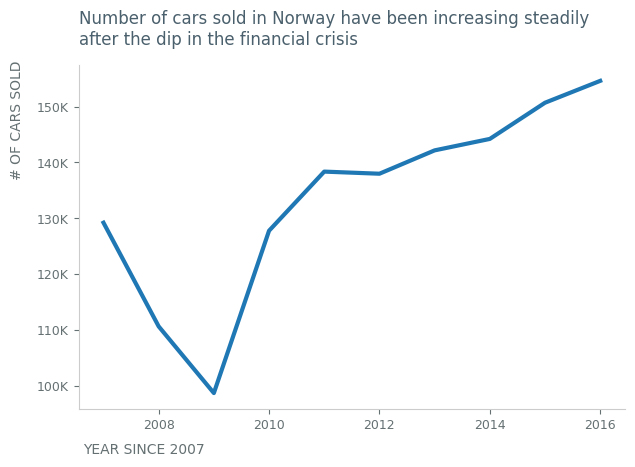

In [57]:
ax = df_yearly_quantity.plot(linewidth = 3)

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize=9)

ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color = GRAY_3, 
    pad=15
)

ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2) # possible add on:  fontweight= "bold"
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)

ax.xaxis.set_label_coords(0.12, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.84)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/Storytelling_line_1.png" , dpi = 300)


### annotate and change line style

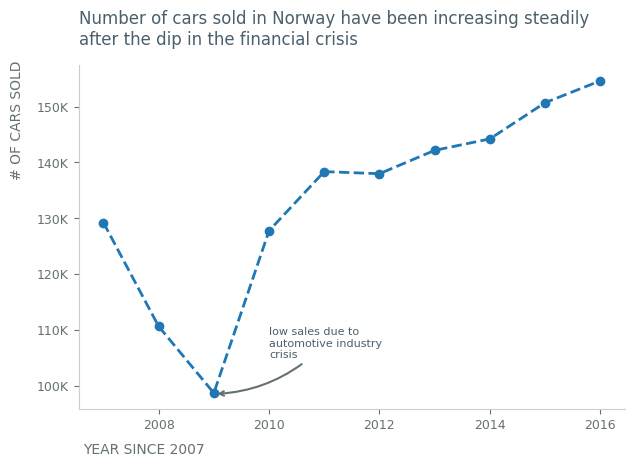

In [71]:
ax = df_yearly_quantity.plot(linewidth = 2, style = "--o")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize=9)

ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color = GRAY_3, 
    pad=15
)

ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2) # possible add on:  fontweight= "bold"
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)

ax.xaxis.set_label_coords(0.12, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.84)

arrowprops = dict(
    arrowstyle="->", connectionstyle=f"arc3, rad={-.2}", linewidth=1.5, color=GRAY_2
)
ax.annotate(
    text="low sales due to \nautomotive industry\ncrisis",
    xy=(2009.01, 98500),
    fontsize=8,
    color=GRAY_3,
    arrowprops=arrowprops,
    xytext=(2010, 105000),
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/Storytelling_line_2.png" , dpi = 300)